<a href="https://colab.research.google.com/github/stepsbtw/Statistical-Inference/blob/main/GCC1625_T1_CAIO_PASSOS_TORKST_FERREIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Páginas de livros didáticos
Considere uma população de **livros didáticos** com aproximadamente o mesmo tamanho físico. Nessa população, considere que a característica (isto é, a variável) de interesse é a quantidade de páginas contida em cada livro. Sendo assim, a população subjacente corresponde a um conjunto de valores numéricos inteiros positivos (correspondentes à quantidade de páginas de cada livro).

Nesta parte do trabalho, você irá abordar a situação descrita acima como um problema de **Probabilidade**, e não como um problema de Estatística. Em um problema de Probabilidade, normalmente supõe-se que é conhecida a distribuição da população (o que não acontece em um problema de Estatística). Assim, considere que a variável aleatória correspondente é a quantidade de páginas em um livro da população, e que essa variável segue uma **distribuição uniforme discreta** nos inteiros de 150 até 300. Isso significa que um livro pode ter no mínimo 150 e no máximo 300 páginas, com igual **probabilidade** para qualquer quantidade de páginas nesse intervalo.

(i) Esboce um gráfico (histograma) da distribuição da população com relação à característica quantidade de páginas. Dica: observe que esta população é modelada por uma **distribuição discreta uniforme.**

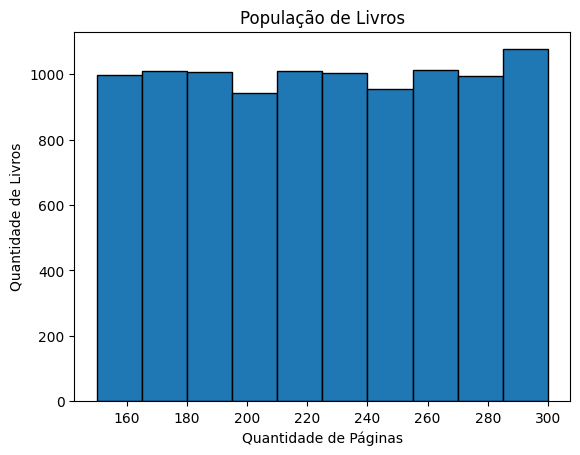

In [180]:
import numpy as np
import matplotlib.pyplot as plt

page_min = 150
page_max = 300
population_size = 10000

rng = np.random.default_rng()
population_pages = rng.integers(page_min, page_max+1, size=population_size) # distribuicao uniforme de inteiros.

plt.hist(population_pages, edgecolor="black")
plt.title("População de Livros")
plt.xlabel("Quantidade de Páginas")
plt.ylabel("Quantidade de Livros")
plt.show()

(ii) Encontre a média (μ), a variância (σ²) e o desvio padrão (σ) da distribuição da população. Dica: use as fórmulas da distribuição uniforme discreta.

In [181]:
mean = (page_min + page_max)/2
var = ((page_max - page_min + 1)**2 - 1) / 12
std = np.sqrt(var)

print(f"Média Populacional : μ = {mean}")
print(f"Variância Populacional : σ² = {var}")
print(f"Desvio Padrão Populacional : σ = {std}")

Média Populacional : μ = 225.0
Variância Populacional : σ² = 1900.0
Desvio Padrão Populacional : σ = 43.58898943540674


(iii) Considere que o plano amostral utilizado é uma **amostragem aleatória simples com reposição** (simple random sample with replacement). Considere tomar **amostras de tamanho 2** dessa população e calcular a **média de cada amostra**. Para cada amostra, você terá uma estatística pontual (a média amostral x). Ao gerar **todas** as possíveis amostras aleatórias de tamanho 2, a distribuição de todas essas médias constitui a **distribuição amostral da média** (sampling distribution of the sample mean) para n = 2.

- Primeiro, implemente uma função que gere todas as possíveis amostras de tamanho 2 com reposição, e compute a média de cada uma. Por exemplo, para as amostras (200, 200) e (300, 250), as médias seriam 200 e 275, respectivamente. Note que diferentes amostras podem produzir a mesma média (como, por exemplo, (250, 300), (275, 275), (280, 270), etc.).

- Em seguida, usando os valores das médias obtidas, esboce um histograma da distribuição amostral da média.

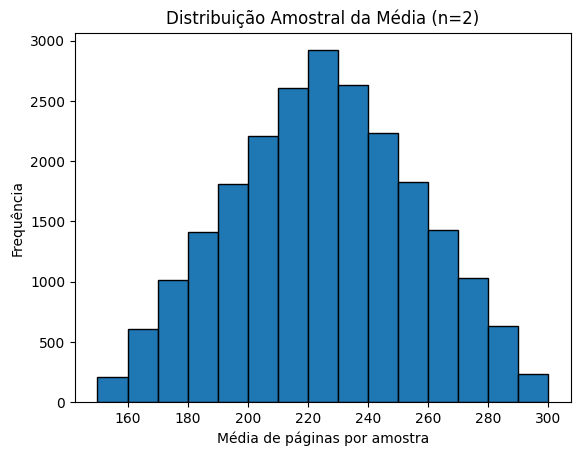

In [182]:
import itertools

sample_size = 2

# distribuicao amostral teorica
def sampling_means(population):
  samples = np.array(list(itertools.product(range(page_min,page_max+1),repeat=2))) # permutação com repetição
  # com permutacao seria n*(n-1), nesse caso são n**2.
  return samples.mean(axis=1)

sample_means = sampling_means(population_pages)

plt.hist(sample_means, edgecolor="black",bins=15)
plt.title("Distribuição Amostral da Média (n=2)")
plt.xlabel("Média de páginas por amostra")
plt.ylabel("Frequência")
plt.show()


Distribuição amostral da média aproxima uma Normal!

(iv) Calcule a **média** (μx), a **variância** (σ²x) e o **desvio padrão** (σx) da
distribuição amostral obtida no item anterior.
Dica: use as funções mean e var da sua linguagem de programação
preferida (como Python ou R).

In [183]:
sampling_dist_mean = np.mean(sample_means)
sampling_dist_var = np.var(sample_means)
sampling_dist_std = np.std(sample_means)

print(f"Média da Distribuição Amostral da Média : μx = {sampling_dist_mean}")
print(f"Variância da Distribuição Amostral da Média : σ²x = {sampling_dist_var}")
print(f"Desvio Padrão da Distribuição Amostral da Média : σx = {sampling_dist_std}")

Média da Distribuição Amostral da Média : μx = 225.0
Variância da Distribuição Amostral da Média : σ²x = 950.0
Desvio Padrão da Distribuição Amostral da Média : σx = 30.822070014844883


(v) O **Teorema Central do Limite** fornece expressões teóricas para os
valores esperados da média e do desvio padrão da distribuição amostral
da média x. Use essa teoria e os valores do item (ii) para calcular esses
parâmetros no caso de n = 2, e compare com os resultados obtidos no
item (iv).

In [184]:
# pelo CLT, quando n->inf:
sampling_dist_mean = mean
sampling_dist_std = std/np.sqrt(sample_size)

print(f"Pelo CLT -> μx = μ : {sampling_dist_mean}")
print(f"Pelo CLT -> σx = σ/sqrt(n) : {sampling_dist_std}")

Pelo CLT -> μx = μ : 225.0
Pelo CLT -> σx = σ/sqrt(n) : 30.822070014844883


(vi) Agora, suponha que desejamos estudar a distribuição amostral da média para amostras de tamanho n = 9.

a) Quantas amostras diferentes de tamanho 9 podem ser geradas a
partir da população? Essa tarefa é viável de ser feita manualmente ou com auxílio computacional?

In [185]:
population_size**9

1000000000000000000000000000000000000

Não é viável manualmente, e nem computacionalmente. (Talvez um dia, com computadores quânticos.)

(b) Gere uma distribuição amostral empírica da média (uma aproximação da distribuição teórica) para n = 9.
Dica: gere uma grande quantidade de amostras aleatórias e construa um histograma com as médias amostrais obtidas.

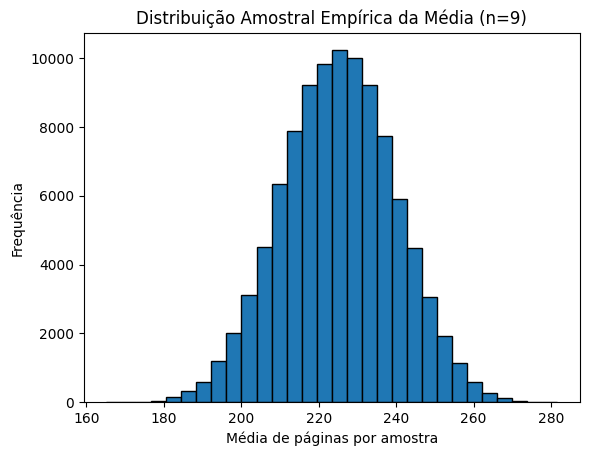

Média da distribuição, aproximadamente a Populacional = 225.1047177777778
Desvio Padrão da distribuição = 14.593433426670058
Desvio Padrão estimado da População = 43.780300280010174


In [186]:
n = 9
N = 100000

#samples = [rng.choice(population_pages,size=n) for _ in range(N)]
#sample_means = [np.mean(sample) for sample in samples]
samples = rng.choice(population_pages, size=(N,n), replace=True)
sample_means = samples.mean(axis=1)

plt.hist(sample_means, edgecolor="black",bins=30)
plt.title("Distribuição Amostral Empírica da Média (n=9)")
plt.xlabel("Média de páginas por amostra")
plt.ylabel("Frequência")
plt.show()

sampling_dist = sample_means.mean()
sampling_std = sample_means.std(ddof=1)

estimated_std = sampling_std * np.sqrt(n)
print(f"Média da distribuição, aproximadamente a Populacional = {sampling_dist}")
print(f"Desvio Padrão da distribuição = {sampling_std}")
print(f"Desvio Padrão estimado da População = {estimated_std}")

#2) Problema dos tanques alemães
Durante um conflito fictício, o serviço de inteligência de um país deseja estimar a quantidade total de veículos blindados produzidos por um país adversário. Esses veículos são numerados sequencialmente a partir de 1 (por exemplo: 1, 2, 3, ..., N ), e alguns deles foram capturados no campo de
batalha.

Suponha que foram capturados aleatoriamente k = 5 tanques com os
seguintes números de série:
{17, 32, 45, 59, 88}

**Objetivo:** estimar o número total N de tanques produzidos pelo inimigo,
usando métodos estatísticos apropriados.

(i) Apresente uma estimativa pontual de N com base na amostra coletada,
usando o seguinte estimador clássico:

𝑁̂ = 𝑀 + (𝑀/𝑘) -1

onde M é o maior número observado na amostra, e k é o tamanho da
amostra.

In [187]:
sample = [17,32,45,59,88]
M = max(sample)
k = len(sample)
N_hat = M + (M/k) -1

print(int(N_hat))

104


(ii) Implemente (ou descreva) uma simulação computacional que reproduza
o processo de amostragem aleatória de 𝑘 = 5 tanques a partir de uma
população com N = 100 tanques numerados sequencialmente. Repita
esse processo muitas vezes (por exemplo, 10.000 vezes) e registre as
estimativas 𝑁̂ em cada simulação.

In [188]:
import numpy as np
import matplotlib.pyplot as plt

N_tanks = 100
k = 5 # size of sample
N_samples = 10000

tanks_population = np.arange(1,N_tanks+1)

rng = np.random.default_rng()
# sem reposicao (simular a situacao real)
samples = np.array([rng.choice(tanks_population, k, replace=False) for _ in range(N_samples)])

M = samples.max(axis=1)
N_hats = M + (M/k) -1 # operacoes vetoriais

(iii) Construa um histograma com as estimativas obtidas na simulação do
item anterior e analise o comportamento do estimador 𝑁̂. Ele é viesado? Subestima ou superestima frequentemente o verdadeiro valor de
𝑁 ?

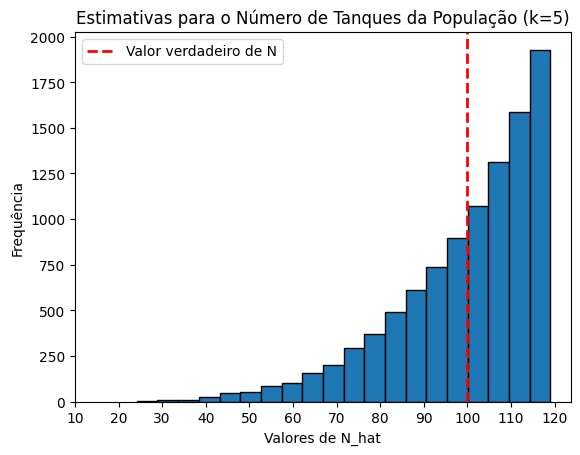

In [189]:
plt.hist(N_hats,edgecolor="black",bins=20)
plt.title("Estimativas para o Número de Tanques da População (k=5)")
plt.xlabel("Valores de N_hat")
plt.xticks(range(10,130,10))
plt.ylabel("Frequência")
plt.axvline(x=100, color='red', linestyle='--', linewidth=2, label='Valor verdadeiro de N')
plt.legend()
plt.show()

O estimador não é viesado, o valor esperado aproxima bem o parâmetro, não só subestima como também superestima o valor, o que acaba convergindo a um ponto central, em média.

É importante destacar que o formato do histograma pode enganar em relação ao viés, pois essa distribuição, apesar de assimétrica, tem a média centrada pois suas caudas se balanceiam.

(iv) Calcule a média, a variância e o desvio padrão das estimativas geradas pela simulação. Compare com o valor real de N = 100 e discuta os
resultados.

In [190]:
print(f"Média k=5: {N_hats.mean()}") # valor real = 100
print(f"Variância k=5: {N_hats.var(ddof=1)}")
print(f"Desvio Padrão k=5: {N_hats.std(ddof=1)}")
print(f"Precisão k=5: {1/N_hats.var(ddof=1)}")

Média k=5: 100.1294
Variância k=5: 272.031898829883
Desvio Padrão k=5: 16.49338954944929
Precisão k=5: 0.0036760394803013775


A média das estimativas N_hat geradas pela simulação estão próximas do parâmetro N, mostra que o estimador não é enviesado.

Porém, a alta variância e desvio padrão mostram que o estimador tem baixa precisão.

(v) Agora, repita a simulação para diferentes tamanhos de amostra (k =
2, 5, 10, 20). Como o tamanho da amostra influencia a qualidade da
estimativa de N ?

Tamanho da amostra k = 2
Média das estimativas de N = 100.06715
Desvio Padrao das estimativas de N = 35.26726235273849

Tamanho da amostra k = 5
Média das estimativas de N = 100.03952
Desvio Padrao das estimativas de N = 16.551562391247515

Tamanho da amostra k = 10
Média das estimativas de N = 99.81764
Desvio Padrao das estimativas de N = 8.829664949969104

Tamanho da amostra k = 20
Média das estimativas de N = 100.008005
Desvio Padrao das estimativas de N = 4.304735850786842



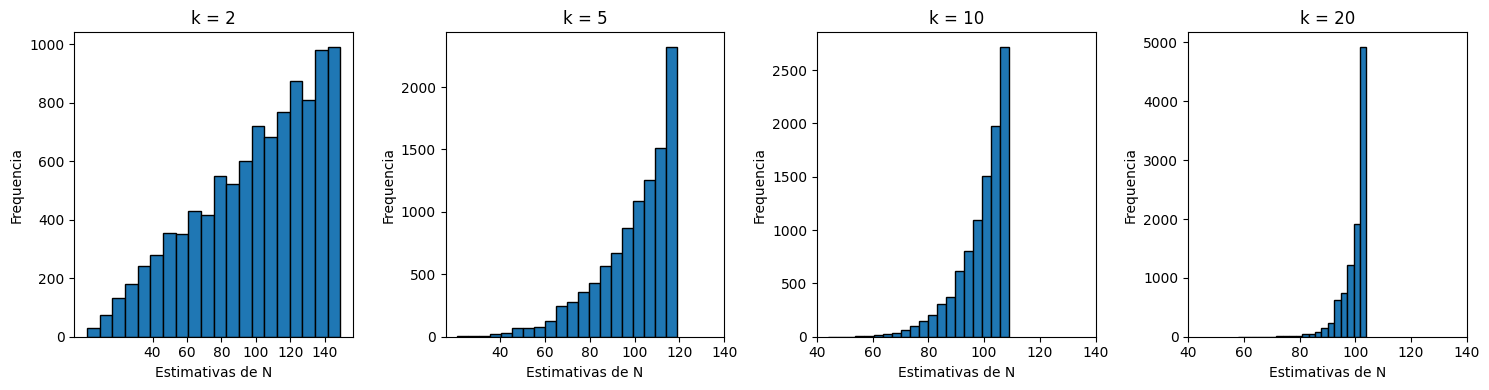

In [222]:
k_vals = [2,5,10,20]

sampling_dist_means = []
sampling_dist_stds = []

fig, axs = plt.subplots(1,len(k_vals),figsize=(15,4))

N_hats = []
for i,k in enumerate(k_vals):
  N_hats_k = []
  for _ in range(N_samples):
    sample = rng.choice(tanks_population, size=k, replace=False)
    M = sample.max()
    N_hats_k.append(M + M/k -1)

  # calculando para cada k
  sampling_dist_means.append(np.mean(N_hats_k))
  sampling_dist_stds.append(np.std(N_hats_k, ddof=1))

  # plotando as estimativas Nhat de cada tamanho de amostra.
  axs[i].hist(N_hats_k, edgecolor="black",bins=20)
  axs[i].set_title(f"k = {k}")
  axs[i].set_xlabel("Estimativas de N")
  axs[i].set_ylabel("Frequencia")
  axs[i].set_xticks(range(40,150,20))

  N_hats.append(N_hats_k)

for i, k in enumerate(k_vals):
  print(f"Tamanho da amostra k = {k}")
  print(f"Média das estimativas de N = {sampling_dist_means[i]}")
  print(f"Desvio Padrao das estimativas de N = {sampling_dist_stds[i]}\n")

plt.tight_layout()
plt.show()

Com um tamanho de amostras muito pequenas, os valores ficam mais "espalhados", a variância é maior e, consequentemente, a precisão menor.

Portanto, para ter uma estimativa de melhor qualidade com menor quantidade de amostras, precisamos que as amostras tenham um tamanho maior.

(vi) Proponha um intervalo de confiança para N com base nas simulações.
Discuta se o verdadeiro valor (N = 100) costuma estar dentro do intervalo estimado.

In [224]:
import scipy.stats as st
# INTERVALO DE CONFIANCA PARA TAMANHO DE AMOSTRAS PEQUENAS n<30 !
# as amostras nao formam uma normal. nao posso usar t de student

intervals = [np.percentile(N_hat, [2.5,97.5]) for N_hat in N_hats] # 95% de confiança

print(f"k=2 : {[float(intervals[0][0]), float(intervals[0][1])]}")
print(f"k=5 : {[float(intervals[1][0]), float(intervals[1][1])]}")
print(f"k=10 : {[float(intervals[2][0]), float(intervals[2][1])]}")
print(f"k=20 : {[float(intervals[3][0]), float(intervals[3][1])]}")

k=2 : [24.5, 147.5]
k=5 : [57.8, 119.0]
k=10 : [76.0, 109.0]
k=20 : [88.25, 104.0]


Sim. Com 95% de confiança, o valor verdadeiro de N costuma estar dentro do intervalo estimado.

Quanto maior o k (tamanho da amostra), mas estreito fica o intervalo, (melhor fica a estimativa). Ou seja, realmente, com pouca informação temos uma margem de erro maior.

(vii) Contextualização histórica: Pesquise brevemente como esse problema
foi utilizado durante a Segunda Guerra Mundial. Comece sua pesquisa
pela entrada correspondente na Wikipedia. Quais foram as conclusões
reais tiradas a partir dos números de série? Comente a importância
histórica da inferência estatística nesse contexto

A Alemanha estava produzindo bem menos tanques de guerra do que os Aliados achavam. As estimativas tradicionais diziam que os Alemães produziam mais de 1400 tanques por mês entre 1940 e 1942. Mas utilizando-se da inferência estatística, o estimador previa cerca de 246 por mês, o que revelava uma capacidade industrial muito menor do que se esperava. Depois, foi confirmado o valor ser de 245 por mês.

A importância da inferência estatística nesse contexto é enorme, pois mesmo com pouquíssimas amostras da população foram possíveis realizar estimativas extremamente precisas. O que quebrou a dependência destes países a espionagem, permitiu melhores planejamentos militares e salvou milhares de vidas.

Com certeza uma ferramenta fundamental estratégica para embates, decisões políticas e econômicas.

#3) Diferença de médias
Considere que um pesquisador tenha desenvolvido um medicamento que supostamente melhora a memória. Considere duas populações hipotéticas: o
desempenho das pessoas em um teste de memória se elas tiverem tomado o
medicamento e o desempenho das pessoas se não tiverem. Suponha que a
média (μ1) e a variância (σ²1) da distribuição das pessoas que tomam o medicamento sejam 50 e 25, respectivamente, e que a média (μ2) e a variância (σ²2) da distribuição das pessoas que não tomam o medicamento sejam 40 e 24, respectivamente. Segue-se que o medicamento, em média, melhora o desempenho no teste de memória em 10 pontos. Essa melhora de 10 pontos é para toda a população.

Agora, considere a distribuição amostral da diferença entre as médias. Essa distribuição pode ser entendida pensando no seguinte plano amostral:

1. Produzir uma amostra de n1 escores da população de pessoas que tomam o medicamento e computar a média. Essa média será designada
como M1.

2. Em seguida, produzir uma amostra de n2 escores da população de pessoas que não tomam o medicamento e computar a média. Essa média
será designada como M2.

3. Calcular a diferença entre M1 e M2. Essa diferença será chamada de
Md, onde o d significa “diferença”. Esta é o estatística cuja distribuição
amostral é de interesse.

A distribuição amostral pode ser aproximada repetindo o plano amostral
acima várias vezes e plotando os valores de Md. A distribuição de frequência (histograma) resultante seria uma aproximação da distribuição amostral. A média (μMd ) e a variância (σ²Md ) da distribuição amostral de Md são:

- μMd = μ1 − μ2
- σ²Md = σ²1/n1 + σ²2/n2

(i) Utilizando o plano amostral descrito acima, produza um histograma
que aproxima a distribuição amostral de Md. Dica: repita os passos
do plano amostra descrito 10000 vezes. Em seguida, crie o histograma
solicitado com os 10000 valores produzidos.

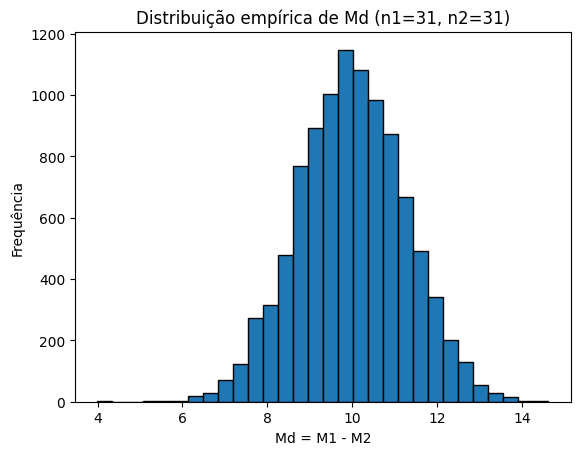

In [193]:
import numpy as np
# ENCONTRAR A DISTRIBUICAO AMOSTRAL DA DIFERENCA DAS MEDIAS.

rng = np.random.default_rng()

mu_1, var_1 = 50, 25

mu_2, var_2 = 40, 24

n1 = n2 = 31
N_samples = 10000

Md_estimates = []
for _ in range(N_samples):
  sample_1 = rng.normal(mu_1, np.sqrt(var_1), size=n1)
  sample_2 = rng.normal(mu_2, np.sqrt(var_2), size=n2)
  M1 = sample_1.mean()
  M2 = sample_2.mean()
  Md_estimates.append(M1-M2)

plt.hist(Md_estimates, edgecolor="black", bins=30)
plt.title(f"Distribuição empírica de Md (n1={n1}, n2={n2})")
plt.xlabel("Md = M1 - M2")
plt.ylabel("Frequência")
plt.show()

(ii) Usando a aproximação da distribuição amostral de Md obtida no item
anterior, compute aproximações para a média e o desvio padrão dessa
estatística. Os valores que você obteve são próximos aos fornecidos
acima? Explique

In [194]:
mu_Md = np.mean(Md_estimates)
std_Md = np.std(Md_estimates)

mu_Md_real = mu_1 - mu_2
std_Md_real = np.sqrt(var_1/n1 + var_2/n2)

print(f"Média empírica = {mu_Md}")
print(f"Desvio Padrão empírico = {std_Md}")

print(f"Média teórica = {mu_Md_real}")
print(f"Desvio Padrão teórico = {std_Md_real}")

Média empírica = 9.988347298335452
Desvio Padrão empírico = 1.258815093675003
Média teórica = 10
Desvio Padrão teórico = 1.2572371141874243


Sim a média e o desvio padrão da simulação se aproximam muito bem dos valores reais.

Isso significa que o plano amostral funciona.

Pelo TLC, se amostra é grande temos a garantia de que esses valores irão convergir. Na prática utilizamos um tamanho de amostra n>30.

Como o exercício fornece apenas as médias e variâncias das populações e não especifica a distribuição das variáveis, é razoável assumir que elas seguem distribuições normais.

Nesse caso, como extraímos as amostras de duas **normais** acaba que o resultado é sempre normal, independente do tamanho da amostra. O que nos garante o resultado aqui é a **Lei dos Grandes Números** que ao amostrar um grande número de vezes 10000, o valor esperado do estimador aproxima bem o parâmetro.



(iii) Uma vez conhecidos a média e o erro padrão da distribuição amostral de uma estatística, é possível responder a diversas perguntas. Para o caso
da estatística aqui mencionada (diferença entre as médias), responda
a seguinte pergunta: Se um experimento com o medicamento para a
memória descrito for realizado, qual é a probabilidade de a média do
grupo de 10 sujeitos que receberam o medicamento ser 15 ou mais pontos
maior do que a média dos 8 sujeitos que não receberam o medicamento?

In [195]:
import scipy.stats as st
n1 = 10
n2 = 8
# qual a probabilidade da diferenca entre as medias ser >= 15
z_score = 15
prob = 1 - st.norm.cdf(z_score, loc=mu_Md, scale=std_Md)
print(prob)


3.427745993844766e-05


A probabilidade é quase nula. Visto que temos uma média de 10 e desvio padrão aprox. 1.2, um valor tão extremo como 15 estaria muito distante da média.

Como estamos falando de uma distribuição que segue a normal, quanto maior a distância da média, menos provável são os valores.

#4 Áudio ou texto?
Imagine que você seja um candidato a emprego tentando apresentar suas habilidades a um recrutador em um processo seletivo de uma empresa. Em qual das duas condições abaixo você teria mais chances de conseguir o emprego?

- você grava um áudio com um breve discurso descrevendo suas habilidades para o recrutador;
- você escreve um breve texto para que o recrutador o leia.

A questão de pesquisa acima foi levantada por Schroeder and Epley
(2015). Nesse artigo, os autores concluíram que a maneira como uma pessoa
fala (ou seja, tom vocal, cadência, etc.) comunica informações sobre seu intelecto melhor do que suas palavras escritas (mesmo que sejam as mesmas
palavras usadas no discurso falado). Para examinar a questão de pesquisa descrita acima, os autores designaram aleatoriamente 39 recrutadores profissionais de empresas da Fortune 5003 para uma de duas condições.

- Na condição de áudio, os participantes ouvem gravações de áudio do
discurso falado de um candidato a emprego.
- Na condição de transcrição, os participantes lêem uma transcrição do
discurso do candidato a emprego.

Depois de ouvir ou ler o discurso, os participantes classificaram os candidatos a emprego em três dimensões: inteligência, competência e foco. Essas classificações foram então usadas para criar uma única medida do intelecto do candidato, com pontuações mais altas indicando que os recrutadores classificaram os candidatos como superiores em intelecto. Os participantes também avaliaram sua impressão geral do candidato ao emprego (uma combinação de dois itens medindo impressões positivas e negativas). Por fim, os participantes indicaram qual o potencial de recomendar a contratação do candidato (0 - nada provável, 10 - extremamente provável).

O conjunto de dados fornecido para realizar essa parte do trabalho está no
arquivo SchroederEpley2015data.txt. Nesse conjunto de dados, há várias
colunas. Contudo, há duas colunas de interesse para esta parte do trabalho.

- a coluna CONDITION indica o condição à qual cada recrutador foi alocado. O valor 1 indica que o recrutador foi alocado na condição de
áudio; O valor 0 indica que o recrutador foi alocado na condição de
transcrição.
- a coluna Intellect_Rating indica a avaliação que cada recrutador
atribuiu ao candidato. Essa avaliação é um valor inteiro entre 0 e 10.
Repare que a coluna CONDITION permite dividir a coleção de valores de
avaliações em duas amostras distintas, que vamos chamar de Sa e de St.

As amostras Sa e St correspondem aos valores de avaliação atribuídos por
recrutadores nas condições de áudio e de transcrição, respectivamente.
Agora, com base nas informações fornecidas acima, responda aos itens a
seguir.

In [196]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1625/refs/heads/main/data/SchroederEpley2015data.txt")
# checando o dataset
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CONDITION          39 non-null     int64  
 1   compt              39 non-null     int64  
 2   thought            39 non-null     int64  
 3   intell             39 non-null     int64  
 4   like               39 non-null     int64  
 5   pos                39 non-null     int64  
 6   neg                39 non-null     int64  
 7   hire               39 non-null     int64  
 8   age                39 non-null     object 
 9   gender             39 non-null     object 
 10  time               39 non-null     float64
 11  wordcount          39 non-null     object 
 12  negR               39 non-null     int64  
 13  intellect          39 non-null     float64
 14  impression         39 non-null     float64
 15  speaker            39 non-null     int64  
 16  pnum               39 non-nu

,CONDITION,compt,thought,intell,like,pos,neg,hire,age,gender,...,pnum,meanhire,meanintellect,meanimpression,centhire,centintellect,centimpression,Intellect_Rating,Impression_Rating,Hire_Rating
0,1,7,7,7,7,7,1,7,29,2,...,1,4.583333,5.722222,6.638889,2.416667,1.277778,1.361111,6.000000,7.000000,6
1,1,6,8,6,6,6,6,5,27,2,...,2,4.666667,5.577778,5.777778,0.333333,1.088889,-0.111111,5.666667,4.666667,4
2,1,7,8,6,9,9,1,6,27,2,...,3,4.666667,5.577778,5.777778,1.333333,1.422222,3.555556,6.000000,8.333333,5
3,0,4,3,6,6,6,6,5,40,2,...,4,4.583333,5.722222,6.638889,0.416667,-1.388889,-0.972222,3.333333,4.666667,4
4,0,2,3,1,2,2,8,2,32,2,...,5,4.583333,5.722222,6.638889,-2.583333,-3.722222,-4.305556,1.000000,1.333333,1


(i) Compute a média e o tamanho (quantidade de observações) tanto para
Sa quanto St.

In [197]:
# vamos dividir em Sa e St (condition 1 e 0)
Sa = df[df["CONDITION"]==1]["Intellect_Rating"]
St = df[df["CONDITION"]==0]["Intellect_Rating"]

print(f"{Sa.shape[0]} em condicao de audio, Média das Notas = {Sa.mean()}")
print(f"{St.shape[0]} em condicao de transcricao, Média das Notas = {St.mean()}")

21 em condicao de audio, Média das Notas = 5.634920634920636
18 em condicao de transcricao, Média das Notas = 3.6481481481481493


(ii) Construa um boxplot para apresentar graficamente as duas amostras.
Seu gráfico deve ser semelhante ao apresentado na Figura 1. Em Python, você pode usar a biblioteca Seaborn. Em R, você pode usar a biblioteca GGPLOT2. Forneça uma análise das informações fornecidas pelo gráfico.

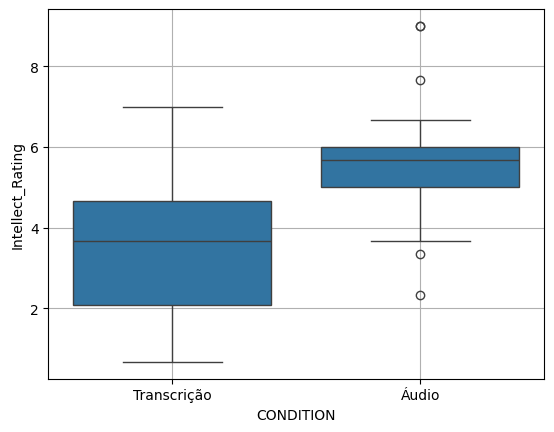

In [198]:
import seaborn as sns

sns.boxplot(data=df, x='CONDITION', y='Intellect_Rating')
plt.xticks([0,1], ["Transcrição", "Áudio"])
plt.grid(True)

Pessoas análisadas por áudio costumam ser mais bem avalidas, sua grande maioria (50% dos dados) com um Intelect Rating entre 5 e 6. Com a presença de alguns outliers, mas nada que afete tanto a concentração das massas.

Já as por texto, além de notas mais baixas, costumam ser mais variadas. 50% dos dados estão entre 2 e 4 e possue grandes caudas, que explicita a variedade das avaliações.

(iii) Aplique um teste de normalidade em ambas as amostras, Sa e St. Apresente uma análise do resultado obtido.

In [199]:
from scipy.stats import shapiro # bom para amostras pequenas

stat_sa, p_sa = shapiro(Sa)
stat_st, p_st = shapiro(St)

print(p_sa, p_st)

0.17365077802186274 0.4447967589528345


De acordo com o teste de Shapiro-Wilk, a probabilidade de um valor ser tão grande quanto ou maior que valores provenientes de uma distribuição normal é bem maior que 0.05 (nível de significância aceitável)

Poderia ter utilizado o QQ-plot para visualizar gráficamente, porém, o BOXPLOT obtido no item (iii) já é uma representação gráfica de que a amostra segue uma distribuição normal.

A mediana está próxima do centro da caixa em ambos os grupos, o que mostra a simetria e a presença dos poucos outliers não compromete a interpretação.

(iv) Construa um intervalo de confiança para a média de avaliações produzidas por duas populações distintas, P1 e P2, descritas abaixo.
- P1: todos os recrutadores que ouvem os áudios
- P2: todos os recrutadores que leem os transcritos

Note que a resposta a este item devem ser dois intervalos de confiança.
Nos dois casos, use o nível de confiança de 99%.

In [200]:
# CONSTRUIR OS INTERVALOS DE CONFIANCA 99% PARA A MÉDIA n<30
from scipy.stats import t

# amostras pequenas desvio amostral ddof = 1
mu_x1 = np.mean(St)
var_x1 = np.var(St, ddof=1)
n1 = St.shape[0]

mu_x2 = np.mean(Sa)
var_x2 = np.var(Sa, ddof=1)
n2 = Sa.shape[0]

# as amostras vem de normais! entao ok

interval_m1 = t.interval(0.99, df=n1-1, loc=mu_x1, scale=np.sqrt(var_x1 / n1))
interval_m2 = t.interval(0.99, df=n2-1, loc=mu_x2, scale=np.sqrt(var_x2 / n2))

print(interval_m1, interval_m2)

(np.float64(2.3424725746364117), np.float64(4.953823721659887)) (np.float64(4.636088728439622), np.float64(6.63375254140165))


(v) Com base nos intervalos de confiança obtidos no item anterior, você
acha que a conclusão a que chegaram os autores em Schroeder and
Epley (2015) é válida? Justifique sua resposta

A média das avaliações dos recrutadores que ouviram os áudios (P1) é mais baixa, com intervalo de confiança entre 2.34 e 4.95.

A média dos recrutadores que leram as transcrições (P2) é mais alta, entre 4.63 e 6.63.

Os intervalos indicam, com 99% de confiança, que os recrutadores podem avaliar candidatos melhor por áudio. Mas com cuidado na afirmação, pois o limite superior de um intervalo sobrepõe levemente o inferior do outro.

Esses resultados fazem sentido com a conclusão por Schroeder & Epley (2015), que sugerem que a fala transmite não apenas conteúdo, mas também traços implícitos de intelecto e capacidade cognitiva, apartir de sinais na comunicação.

Na prática, isso implica que candidatos devem preferir apresentações faladas sempre que possível!

#5) Intervalo de confiança para altura média
Essa parte do trabalho envolve computar um intervalo de confiança para a
média das alturas dos estudantes de uma universidade. Você deve realizar
essa parte do trabalho usando como amostra os dados contidos no conjunto de dados fornecido no arquivo survey.csv. Esse conjunto de dados contém
o resultado de uma pesquisa feita com uma amostra de estudantes em uma
universidade australiana. Os atributos desse conjunto de dados são descritos a seguir:

- Sex. O sexo do aluno. (Fator com os níveis Male e Female.)
- Wr.Hnd. vão (distância da ponta do polegar à ponta do dedo mínimo
da mão aberta) da mão que escreve, em centímetros.
- NW.Hnd. extensão da mão que não escreve.
- W.Hnd. mão de escrita. (Left ou Right.)
- Fold. ”Cruze os braços! Qual está no topo? (R on L, L on R, Neither.)
- Pulse. taxa de pulso do aluno (batimentos por minuto).
- Clap. ’Bata palmas! Qual mão está para cima? (Right, Left,None.)
- Exer. quantas vezes o aluno se exercita. (Freq (frequentemente), Some,
None.)
- Smoke. Quanto o aluno fuma. (Heavy, Regul (regularmente), Occas
(occasionalmente), Never.)
- Height. altura do aluno em centímetros.
- M.I. se o aluno expressou a altura em unidades imperiais (pés/polegadas) ou métricas (centímetros/metros). (Metric, Imperial.)
- Age. Idade do aluno em anos.

A variável de interesse está na coluna Height do conjunto de dados. Inicialmente, você deve eliminar valores faltantes (missing values) nessa coluna.


In [201]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/AILAB-CEFET-RJ/gcc1625/refs/heads/main/data/survey.csv", index_col=0)
df.head()

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
1,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
2,Male,19.5,20.5,Left,R on L,104.0,Left,NaN,Regul,177.8,Imperial,17.583
3,Male,18.0,13.3,Right,L on R,87.0,Neither,NaN,Occas,NaN,NaN,16.917
4,Male,18.8,18.9,Right,R on L,NaN,Neither,NaN,Never,160.0,Metric,20.333
5,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


In [202]:
# a variavel de interesse é o Height
df_height = df["Height"]
df_height.count() # checando valores nulos

np.int64(209)

In [203]:
df_height = df_height.dropna() # retirando os valores nulos
df_height.describe() # checando o dataframe

,Height
count,209.000000
mean,172.380861
std,9.847528
min,150.000000
25%,165.000000
50%,171.000000
75%,180.000000
max,200.000000


(i) Usando a distribuição t de Student, calcule um intervalo de confiança no nível de 95% para a altura média dos estudantes da universidade

In [204]:
# intervalo de confianca para altura média! USANDO t de student.
from scipy.stats import t, norm

mu_x = df_height.mean()
n = df_height.shape[0]
s = df_height.std(ddof=1) # correcao de bessel
std_x = s / np.sqrt(n)

'''
t_score = -t.ppf((1-0.95)/2, df=n-1)
interval_ = [mu_x - t_score * std_x, mu_x + t_score * std_x]
print(interval_)
'''

interval = t.interval(confidence=0.95,loc=mu_x,scale=std_x,df=n-1)
print(f"({interval[0]:.2f}, {interval[1]:.2f})")

(171.04, 173.72)


(ii) Construa outro intervalo de confiança, desta vez usando o z-score (em vez do t-score que você usou anteriormente).

In [205]:
interval = st.norm.interval(confidence=0.95,loc=mu_x,scale=std_x)
print(f"({interval[0]:.2f}, {interval[1]:.2f})")

(171.05, 173.72)


(iii) Apresente uma análise comparativa dos dois intervalos de confiança
obtidos.

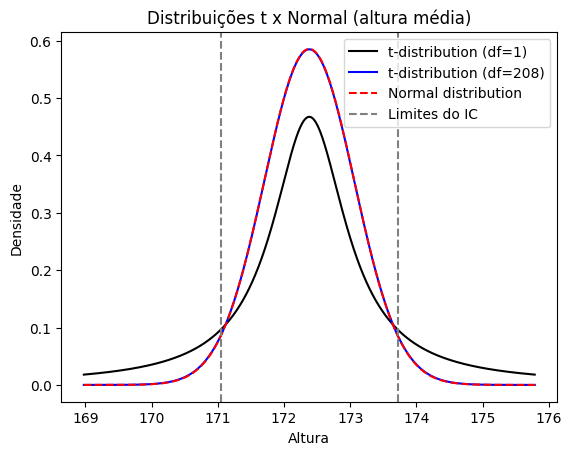

In [206]:
x = np.linspace(mu_x - 5*std_x, mu_x + 5*std_x, 1000)

t_dist_df1 = t.pdf(x, df=1, loc=mu_x, scale=std_x)
t_dist = t.pdf(x, df=n-1, loc=mu_x, scale=std_x)
norm_dist = norm.pdf(x, loc=mu_x, scale=std_x)

plt.plot(x, t_dist_df1, color='black', label='t-distribution (df=1)')
plt.plot(x, t_dist, color='blue', label=f't-distribution (df={n-1})')
plt.plot(x, norm_dist, color='red', linestyle='dashed', label='Normal distribution')

plt.axvline(interval[0], color='gray', linestyle='--', label='Limites do IC')
plt.axvline(interval[1], color='gray', linestyle='--')

plt.title("Distribuições t x Normal (altura média)")
plt.xlabel("Altura")
plt.ylabel("Densidade")
plt.legend()
plt.show()

Nossa amostra é grande o suficiente para que o TLC garanta a convergência da média para a média populacional. E com isso não é necessário se atentar quanto a normalidade da distribuição da qual a amostra foi retirada.

A t de Student é especialmente útil quando o tamanho da amostra é pequeno. Utilizando a distribuição t, estamos levando em consideração a incerteza  introduzida pela estimação do desvio padrão da população a partir da amostra.

Ainda assim, para amostras grandes, a distribuição t se aproxima demais da normal, e os dois testes se tornam praticamente equivalentes.

#6) Intervalo de confiança para proporção
Nesta parte do trabalho, você deve considerar a mesma amostra contida no conjunto de dados survey. Dessa vez, você deve produzir um intervalo de confiança para a proporção de alunos da universidade que são canhotos. Sendo assim, dessa vez a coluna de interesse é W.Hnd.

In [207]:
df_hand = df["W.Hnd"].dropna()
df_hand.describe() # variavel categorica binaria!

,W.Hnd
count,236
unique,2
top,Right
freq,218


(i) Primeiramente, se certifique de que existem pelo menos 10 estudantes destros e pelo menos 10 estudantes canhotos, para que você possa realizar a construção do intervalo de confiança de forma satisfatória.

In [208]:
n = df_hand.shape[0]
canhotos = (df_hand == "Left").sum()
destros = n - canhotos

print(canhotos, destros)

18 218


(ii) Produza o intervalo de confiança solicitado, usando o nível de confiança 90%. Junto com o resultado, forneça também uma análise.

In [209]:
from scipy.stats import norm
# intervalo de confianca para canhotos 90% p/ amostra grande

p_hat = canhotos / n
p_hat_std_error = np.sqrt(p_hat * (1 - p_hat) / n)

alpha = 1 - 0.90
z = -norm.ppf(alpha/2) # normal padrao
margem = z * p_hat_std_error

interval = (p_hat - margem, p_hat + margem)

print(f"({interval[0]:.4f}, {interval[1]:.4f})")
print(f"({interval[0]*100:.2f}%, {interval[1]*100:.2f}%)")

(0.0479, 0.1047)
(4.79%, 10.47%)


Com 90% de confiança, podemos afirmar que a proporção verdadeira de estudantes canhotos na população da universidade australiana está entre 4.79% e 10.47%.

Isso significa que, se repetíssemos esse tipo de amostragem várias vezes, cerca de 90% dos intervalos construídos cobririam a proporção real de canhotos da população.

(iii) Produza o intervalo de confiança solicitado, usando o nível de confiança 95%. Junto com o resultado, forneça também uma análise e compare com o resultado obtido no item anterior.

In [210]:
alpha = 1 - 0.95
z = -norm.ppf(alpha/2)
margem = z * p_hat_std_error

interval = (p_hat - margem, p_hat + margem)

print(f"({interval[0]:.4f}, {interval[1]:.4f})")
print(f"({interval[0]*100:.2f}%, {interval[1]*100:.2f}%)")

(0.0424, 0.1101)
(4.24%, 11.01%)


Para ter uma certeza (nível de confiança) maior, a amplitude do intervalo aumenta para contemplar mais possíveis valores para a proporção populacional - mais segurança, menos precisão -.

Ambos os intervalos indicam que a proporção de canhotos está abaixo de 12%. Os intervalos possuem uma "grande" margem de erro nas suas estimativas.

(iv) Repita os itens (i), (ii) e (iii), desta vez considerando o atributo Sex.

In [211]:
df_sex = df["Sex"].dropna()

n = df_sex.shape[0]
homens = (df_sex == "Male").sum()
mulheres = n - homens

print(homens, mulheres) # 50/50

118 118


In [212]:
p_hat = mulheres / n
p_hat_std_error = np.sqrt(p_hat * (1 - p_hat) / n)

alpha = 1 - 0.90
z = -norm.ppf(alpha/2)
margem = z * p_hat_std_error

interval = (p_hat - margem, p_hat + margem)

print(f"({interval[0]:.4f}, {interval[1]:.4f})")
print(f"({interval[0]*100:.2f}%, {interval[1]*100:.2f}%)")

(0.4465, 0.5535)
(44.65%, 55.35%)


Com 90% de confiança, podemos afirmar que a proporção verdadeira de estudantes canhotos na população da universidade australiana está entre 44.65% e 55.35%

In [213]:
alpha = 1 - 0.95
z = -norm.ppf(alpha/2)
margem = z * p_hat_std_error

interval = (p_hat - margem, p_hat + margem)

print(f"({interval[0]:.4f}, {interval[1]:.4f})")
print(f"({interval[0]*100:.2f}%, {interval[1]*100:.2f}%)")

(0.4362, 0.5638)
(43.62%, 56.38%)


Novamente, a amplitude do intervalo aumenta para contemplar mais possíveis valores para a proporção populacional.

A escolha entre um intervalo menor (90%) ou mais confiável (95%) depende do contexto.

v) A amostra correspondente ao conjunto de dados survey tem tamanho
suficiente para produzir um intervalo de confiança para a característica
Sexo (coluna Sexo) com um erro amostral de 2 pontos percentuais?
Se sim, construa esse intervalo de confiança usando nível de confiança
90%. Se não, explique.

In [214]:
# encontrar o tamanho da amostra para obter 2% de erro amostral
alpha = 1-0.90
z = -norm.ppf(alpha/2)
max_margin = 0.02

p = p_hat # posso aproximar

n = np.ceil(z**2 * p * (1 - p) / max_margin**2)
print(n)

1691.0


Não é possível estimar a proporção de homens e mulheres na população da universidade australiana com a precisão desejada (erro ≤ 2%) usando essa amostra.

Com 118 homens e 118 mulheres, a amostra possui 236 valores para o atributo Sexo, (proporção de 0.5) mas para obter um intervalo de confiança com margem de erro de 2% e nível de confiança de 90%, seria necessário um tamanho mínimo de aproximadamente 1691 indivíduos.

O que pode ser feito para obter essa margem de erro com essa amostra, é gerar um intervalo com um nível de confiança bem menor.